In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
from sklearn.linear_model import SGDRegressor
import iraklis7_linrg.config as config
import iraklis7_linrg.plots as plots
import iraklis7_linrg.modeling.train as train
import iraklis7_linrg.modeling.predict as predict

2026-01-22 13:27:40.728 | INFO     | iraklis7_linrg.config:<module>:18 - PROJ_ROOT path is: /Users/iraklis/git/iraklis7_linrg


### Create and fit the regression model

In [3]:
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
predictions_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PREDICTIONS
model_path: Path = config.MODELS_DIR / config.DATASET_MODEL
plot_path: Path = config.FIGURES_DIR / config.TRAINING_PLOT

features = config.read_data(features_path)
if features is None:
    raise ValueError("read_data failed - data is None")
labels = config.read_data(labels_path)
if labels is None:
    raise ValueError("read_data failed - data is None")

In [4]:
X_features = ['Εμβαδόν','Όροφος Ρετιρέ', 'Κατάσταση', 'Ασανσέρ από 3ο']
features = features[X_features]
features.head()

,Εμβαδόν,Όροφος Ρετιρέ,Κατάσταση,Ασανσέρ από 3ο
0,0.479710,-0.325222,1.247554,-1.343457
1,-0.782906,-0.325222,-0.831703,-1.343457
2,0.576834,3.074824,-0.831703,0.744348
3,-0.151598,-0.325222,1.247554,0.744348
4,-0.734344,-0.325222,-0.831703,0.744348


In [5]:
sgdr = SGDRegressor(max_iter=1000)
train.fit_model(sgdr, features, labels)

2026-01-22 13:27:50.338 | INFO     | iraklis7_linrg.modeling.train:fit_model:15 - SGDRegressor()
2026-01-22 13:27:50.347 | INFO     | iraklis7_linrg.modeling.train:fit_model:16 - number of iterations completed: 55, number of weight updates: 6326.0


/Users/iraklis/git/iraklis7_linrg/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### View parameters
Note, the parameters are associated with the *normalized* input data.

In [6]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w: {w_norm}, b:{b_norm}")

model parameters:  w: [79.85278225  0.48700149 19.03014071 31.33065052], b:[325.81884308]


### Make predictions
Predict the targets of the training data.

In [7]:
# make a prediction using sgdr.predict()
predictions = sgdr.predict(features)
config.write_data(predictions_path,pd.DataFrame(predictions, columns=['ΕκΤιμή']))

print(f"Prediction on training set:\n{predictions[:4]}" )
print(f"Target values \n{labels[:4]}")

Prediction on training set:
[345.61633865 205.22439085 380.87157231 360.61694488]
Target values 
    Τιμή
0  245.0
1  171.0
2  400.0
3  370.0


### Score model's performance

In [8]:
print("SCORE: ", sgdr.score(features, labels))
predict.score_model(labels, predictions)

SCORE:  0.48638331896013665
2026-01-22 13:27:55.124 | INFO     | iraklis7_linrg.modeling.predict:score_model:14 - MAE: 68.56116579376526
2026-01-22 13:27:55.126 | INFO     | iraklis7_linrg.modeling.predict:score_model:15 - MSE: 9157.272000443723
2026-01-22 13:27:55.128 | INFO     | iraklis7_linrg.modeling.predict:score_model:16 - MSLE: 0.07052635014934873
2026-01-22 13:27:55.129 | INFO     | iraklis7_linrg.modeling.predict:score_model:17 - MAPE: 0.21598905694065706
2026-01-22 13:27:55.130 | INFO     | iraklis7_linrg.modeling.predict:score_model:18 - MEAE: 45.09353153954112
2026-01-22 13:27:55.131 | INFO     | iraklis7_linrg.modeling.predict:score_model:19 - MAXE: 433.87459491285574
2026-01-22 13:27:55.131 | INFO     | iraklis7_linrg.modeling.predict:score_model:20 - EVS: 0.4863834632607381


### Plot Results
Let's plot the predictions versus the target values.

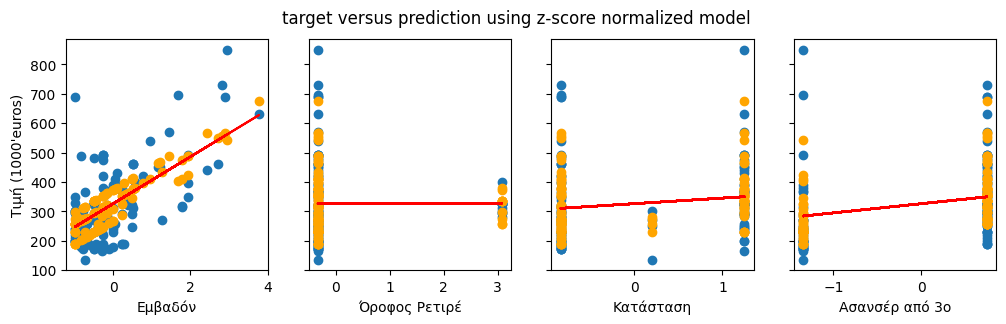

In [9]:
featuresX = features.to_numpy()
plots.gen(list(features), featuresX, labels, predictions, w_norm, b_norm, plot_path, True)

### Save the trained model

In [10]:
train.save_model(sgdr, model_path)

2026-01-22 13:27:59.745 | DEBUG    | iraklis7_linrg.modeling.train:save_model:22 - Model saved to: /Users/iraklis/git/iraklis7_linrg/models/listings_data_model.joblib
